In [17]:
#https://www.kaggle.com/code/easonlai/power-transformer-health-state-data-analysis
#https://www.kaggle.com/code/sradha92/power-transformers-health-condition-dataset#Logistic-Regression-Model
# DATASET: https://www.kaggle.com/datasets/easonlai/sample-power-transformers-health-condition-dataset/

# I create a dataframe that interprets the ['Health index'] column of the main dataframe
import pandas as pd

table = {
    'health_index%' : ['85-100', '70-85','50-70','30-50','0-30'],
    'Column Value'  : [5,4,3,2,1],
    'Condition' : ['Very Good','Good','Fair','Poor','Very Poor'],
    'Expected Lifetime' : ['>15 Years','>10 Years','from 3 to 10 Years','<3 Years','Near to end'],
    'Requirements' : ['Normal Maint.','Normal Maint.','Increase Diag. Test.','Start plan RoR','Immediately RoR']

}
table = pd.DataFrame(table)
table
# TABLE LEGEND: [Normal Maint], [Increase Diag. Test],
# [Start plan RoR = Start Planning Replace or Rebuild], [Immediately RoR = Immediately Replace or Rebuild].

# 85-100 cost = 10 units [Normal Maint = Normal Maintenance].
# 70-85 cost = 10 units [Normal Maint = Normal Maintenance].
# 50-70 cost = 20 units [Increase Diag. Test].
# 30 - 50 cost = 40 units [Start plan RoR = Start plan replacement or rebuild].
# 0 - 30 cost = 80 units [Immediately RoR = Immediately Replace or Rebuild].


,health_index%,Column Value,Condition,Expected Lifetime,Requirements
0,85-100,5,Very Good,>15 Years,Normal Maint.
1,70-85,4,Good,>10 Years,Normal Maint.
2,50-70,3,Fair,from 3 to 10 Years,Increase Diag. Test.
3,30-50,2,Poor,<3 Years,Start plan RoR
4,0-30,1,Very Poor,Near to end,Immediately RoR


DATA EXPLORATION

In [18]:
from google.colab import data_table
import seaborn as sns

health_data = "/content/Health index2.csv"
df = pd.read_csv(health_data)
# creation of dataframe
health_data = df
data_table.enable_dataframe_formatter()
health_data.head(20)


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,75.6
6,10200,11900,33700,573,87,611,0,162,0,1.0,3.53,45,55,5,75.6
7,3,15459,41347,5,68,902,12,2,13,5.0,0.58,41,71,6,73.2
8,16,2470,59600,8,520,2660,5,8,2,164.0,0.29,44,56,4,72.8
9,488,11861,48353,13,85,1957,29,23,0,164.0,0.27,37,72,10,68.0


In [19]:
# visualization of columns
df.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index'],
      dtype='object')

In [20]:
# check for missing values
df.isnull().sum()

Hydrogen               0
Oxigen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
Health index           0
dtype: int64

<Axes: >

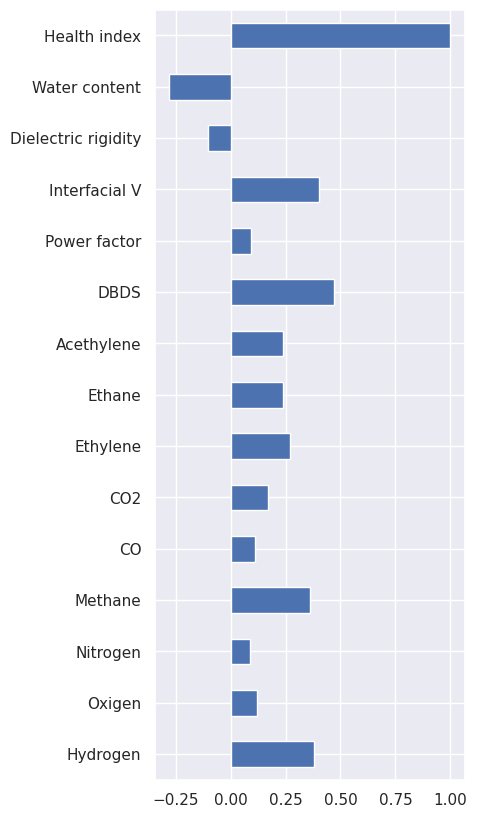

In [21]:
# Correlation between target and characteristics
(df.corr().loc['Health index']
 .plot(kind='barh', figsize=(4,10)))

In [22]:
# calculating the variance
import numpy as np
(df
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

Hydrogen               4008575.3023680984
Oxigen                  200625504.4900649
Nitrogen                189350034.1699587
Methane                239434.39123984938
CO                     56295.859275053306
CO2                     5093103.445833143
Ethylene               1752476.8981717548
Ethane                 117356.69580365649
Acethylene              415207.3208229371
DBDS                   2184.1655235675726
Power factor           37.748847055754666
Interfacial V          38.177943111191766
Dielectric rigidity     41.71746586217847
Water content           292.9453386562628
Health index           314.75932264210866
dtype: object

In [23]:
# overview of dataset characteristics
df['Health index'].describe()

count    470.000000
mean      27.504043
std       17.741458
min       13.400000
25%       13.400000
50%       13.400000
75%       38.550000
max       95.200000
Name: Health index, dtype: float64

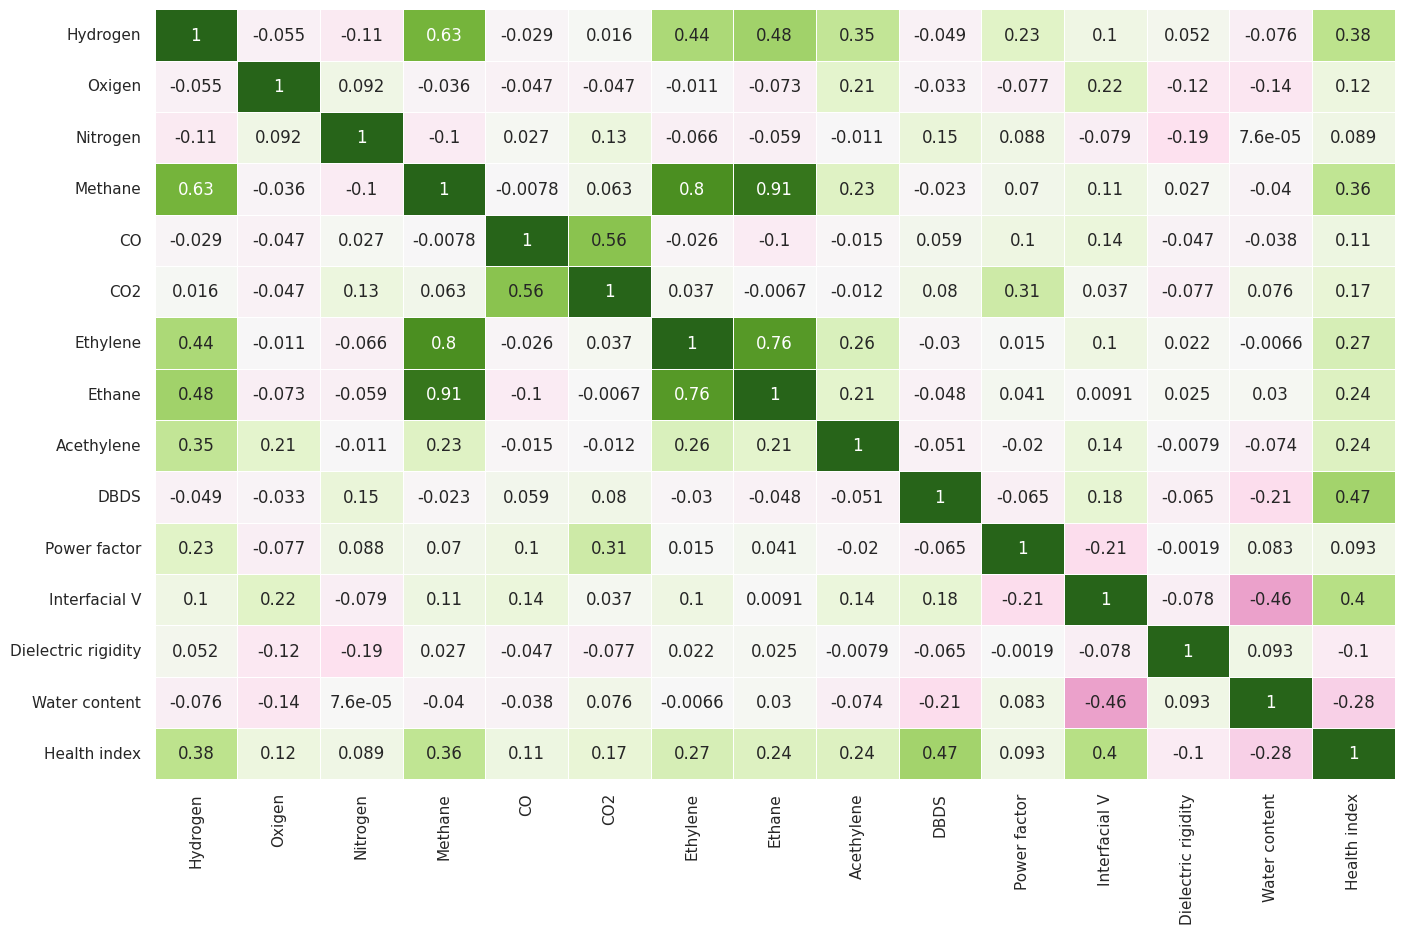

In [24]:
# look at the correlations between the variables
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [25]:
# I standardise variables for further testing
from scipy.stats import zscore

# # Standardisation by specific columns
cols_to_standardize = ['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content']
df_standardized = health_data[cols_to_standardize].apply(zscore)

# Creating a new dataframe with standardised columns
df_standardized = pd.DataFrame(df_standardized, columns=cols_to_standardize)

print(df_standardized.head())


   Hydrogen    Oxigen  Nitrogen    Methane        CO       CO2   Ethylene  \
0  1.220362 -0.176503 -1.448992  14.988363 -0.894458 -0.209553  12.493229   
1  6.240833 -0.586351 -1.652763   1.631148 -0.679282 -0.422472  -0.120178   
2  1.207862  0.568417  0.621312   0.131555  0.054849 -0.326658   0.032574   
3  0.347367 -0.585715 -0.744923   0.951933 -0.253149 -0.183826  -0.118665   
4  1.402861 -0.338350  0.010217   0.164289  0.489421  0.139100  -0.120178   

      Ethane  Acethylene      DBDS  Power factor  Interfacial V  \
0  15.736172   -0.131263  0.042056     -0.138338       1.063786   
1   0.651823   -0.142138  0.598976     -0.138338       1.063786   
2  -0.207301    3.260174 -0.343504     -0.138338       0.091694   
3   0.432658   -0.142138  1.498617      0.444965      -0.880398   
4  -0.113791   -0.135924 -0.343504     -0.175812       0.901771   

   Dielectric rigidity  Water content  
0             0.233144      -0.952364  
1             0.233144      -0.952364  
2            -

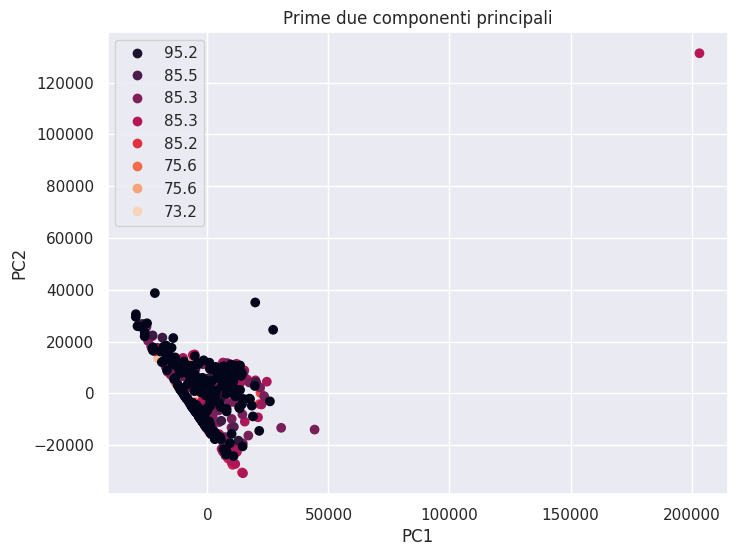

In [26]:
# UNUSED CODE

# I show the first two main components without scaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

X = health_data[['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content']]
y = health_data['Health index']

pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(health_data['Health index']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Prime due componenti principali")
plt.show()

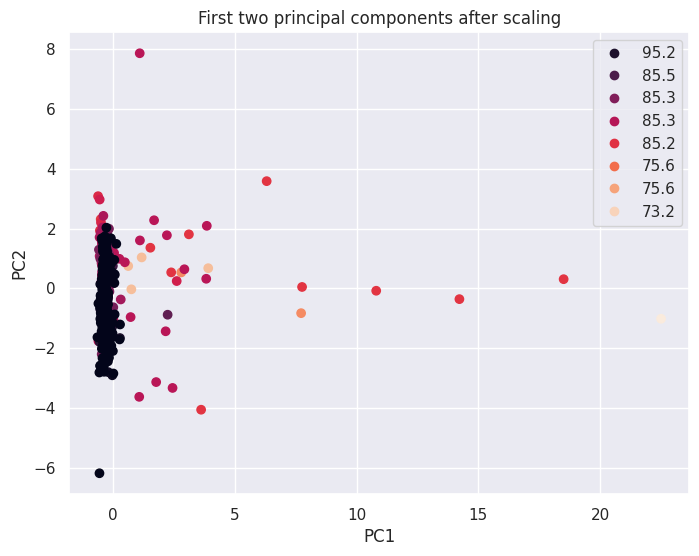

In [27]:
# UNUSED CODE

# I show the first two main components with the scaler
from sklearn.preprocessing import StandardScaler

X = df_standardized[['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content']]
y = health_data['Health index']

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(health_data['Health index']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()


In [28]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# calculate eigendecomposition
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [29]:
# assign a value based on the range
def assegno_valore(salute):
    if salute['Health index'] <= 30:
        return 1
    elif salute['Health index'] <= 50:
        return 2
    elif salute['Health index'] <= 70:
        return 3
    elif salute['Health index'] <= 85:
        return 4
    elif salute['Health index'] <= 100:
        return 5

# I apply the function to the 'Health index' column to create a new 'Value Range' column
health_data['Value Range'] = health_data.apply(assegno_valore, axis=1)

health_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Value Range
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,5
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,5
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,5
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,5


In [30]:
df.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index', 'Value Range'],
      dtype='object')

In [ ]:
# UNUSED CODE
"""
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X = df_standardized[['Hydrogen', 'Oxigen','Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS','Power factor','Interfacial V','Dielectric rigidity','Water content']]
y = health_data['Value Range']

print(Counter(X))
print(Counter(y))

# Definisco la strategia di oversampling
over = RandomOverSampler(sampling_strategy={5: 200, 4: 200, 3: 200, 2: 200})

# Applico e trasformo l'oversampling per X e y
X_over, y_over = over.fit_resample(X, y)

print(Counter(X_over))
print(Counter(y_over))


Counter({'Hydrogen': 1, 'Oxigen': 1, 'Nitrogen': 1, 'Methane': 1, 'CO': 1, 'CO2': 1, 'Ethylene': 1, 'Ethane': 1, 'Acethylene': 1, 'DBDS': 1, 'Power factor': 1, 'Interfacial V': 1, 'Dielectric rigidity': 1, 'Water content': 1})
Counter({1: 285, 2: 135, 3: 41, 5: 5, 4: 4})
Counter({'Hydrogen': 1, 'Oxigen': 1, 'Nitrogen': 1, 'Methane': 1, 'CO': 1, 'CO2': 1, 'Ethylene': 1, 'Ethane': 1, 'Acethylene': 1, 'DBDS': 1, 'Power factor': 1, 'Interfacial V': 1, 'Dielectric rigidity': 1, 'Water content': 1})
Counter({1: 285, 5: 200, 4: 200, 3: 200, 2: 200})


In [31]:
print(X.shape)

(470, 14)


In [35]:
# check if X is effectively a dataframe
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [37]:
# MIX OF UNDERSAMPLIMG AND OVERSAMPLING

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df_standardized[['Hydrogen', 'Oxigen','Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS','Power factor','Interfacial V','Dielectric rigidity','Water content']]
y = health_data['Value Range']

# definition of oversampling strategy
over = RandomOverSampler(sampling_strategy= {5: 285, 4: 285, 3: 285, 2: 285})
# apply
X_over, y_over = over.fit_resample(X, y)

#print the distribution of classes after oversampling
#print(X_over.shape[0])

# definition of undersampling strategy
under = RandomUnderSampler(sampling_strategy= {1: 285})
# apply
X_under, y_under = under.fit_resample(X_over, y_over)

# Calculating the class distribution after oversampling
counter_after_over = Counter(y_over)
labels_after_over, values_after_over = zip(*counter_after_over.items())

print(X.shape[0])
print(X_under.shape[0])
y_under.unique().shape
print(y.shape[0])
print(y_over.shape[0])


470
1425
470
1425


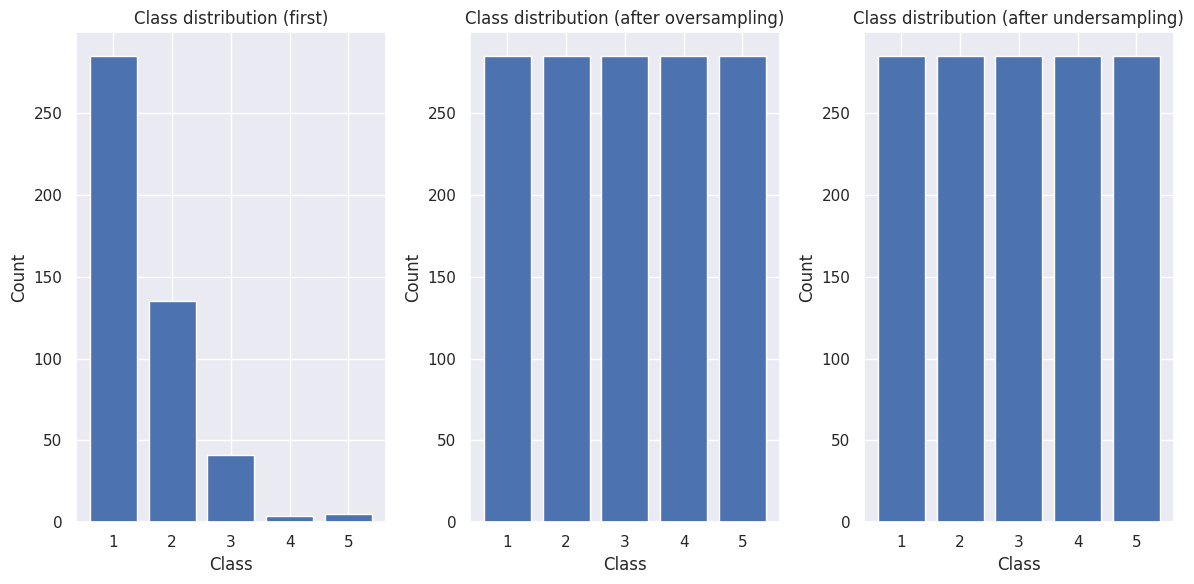

In [39]:
import matplotlib.pyplot as plt

# Calculating the class distribution before oversampling
counter_before = Counter(y)
labels_before, values_before = zip(*counter_before.items())

# Calculating the class distribution after oversampling
counter_after_over = Counter(y_over)
labels_after_over, values_after_over = zip(*counter_after_over.items())

# Calculating the class distribution after undersampling
counter_after_under = Counter(y_under)
labels_after_under, values_after_under = zip(*counter_after_under.items())

# Plot of class distribution before and after oversampling and undersampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(labels_before, values_before)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution (first)')

plt.subplot(1, 3, 2)
plt.bar(labels_after_over, values_after_over)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution (after oversampling)')

plt.subplot(1, 3, 3)
plt.bar(labels_after_under, values_after_under)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution (after undersampling)')

plt.tight_layout()
plt.show()


In [40]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.dates as mpl_dates
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_score, confusion_matrix, auc, f1_score, recall_score

pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)

In [41]:
health_data.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index', 'Value Range'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

#X_concat = pd.concat([X_under, X_over])
#y_concat = pd.concat([y_under, y_over])

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.1, random_state=42)
# Normally you put 0.1 to get more training data, so you get 900 for training and 100 for testing

In [43]:
# CLASSIFIER
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# I divide the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# I create an instance of the SVM classifier
classifier = SVC(kernel='linear', C=1.0)

# Training the model using training data
classifier.fit(X_train, y_train)

# I make predictions on test data
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

# MODEL ACCURACY:

0.8601398601398601


In [44]:
# CLASSIFIER
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# I divide the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#practically train x_train and _train with that model, then assess accuracy with accuracy_score
#after we compare to know which is the best model, then we save max_accuracy as the best model
#afterfor, we run out of tuning, it's actually about finding the best hyper parameyri

#hyperparamater tuning for parameter
# manual hyperparameter tuning for hyperparameter C ((Hold-out Validation Set)): fixed split between train and validation
max_accuracy = -1
for i in [0.25,0.5,0.75,1,1.25,1.5]:
  # I create an instance of the SVM classifier
    classifier = SVC(kernel='linear', C= i)

# Training the model using training data
    classifier.fit(X_train, y_train)
    #DataFlair - Previsione sul set di validazione e calcolo dell'accuratezza
    y_pred_val=classifier.predict(X_val)
    score=accuracy_score(y_val,y_pred_val)

    if score > max_accuracy:
        max_accuracy = score
        best_model = classifier
    print("Option: ", i ,',', f'Accuracy (rounded): {round(score*100,2)}%', ", Accuracy (detailed)", score)
print("Max accuracy: ", max_accuracy, " with best model: ", best_model)


Option:  0.25 , Accuracy (rounded): 81.03% , Accuracy (detailed) 0.8103448275862069
Option:  0.5 , Accuracy (rounded): 80.17% , Accuracy (detailed) 0.8017241379310345
Option:  0.75 , Accuracy (rounded): 81.03% , Accuracy (detailed) 0.8103448275862069
Option:  1 , Accuracy (rounded): 80.17% , Accuracy (detailed) 0.8017241379310345
Option:  1.25 , Accuracy (rounded): 80.17% , Accuracy (detailed) 0.8017241379310345
Option:  1.5 , Accuracy (rounded): 81.03% , Accuracy (detailed) 0.8103448275862069
Max accuracy:  0.8103448275862069  with best model:  SVC(C=0.25, kernel='linear')


In [45]:
# LAST ACCURACY CHECK
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8531468531468531


In [46]:
len(y_test)


143

In [47]:
len(y_val)

116

In [48]:
len(y_pred)

143

In [49]:
#class_names = #np.array([0, 1], dtype=object) #Classes as seen in the Dataset: 0 means Fake News, 1 means Real News.
class_names = [5,4,3,2,1]
real_labels = ['Very Good','Good','Fair','Poor','Very Poor']

class_names.reverse()
real_labels.reverse()

Confusion matrix, without normalization
[[18 10  0  1  0]
 [ 4 21  1  1  0]
 [ 3  0 27  1  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 33]]
Normalized confusion matrix
[[0.62068966 0.34482759 0.         0.03448276 0.        ]
 [0.14814815 0.77777778 0.03703704 0.03703704 0.        ]
 [0.09677419 0.         0.87096774 0.03225806 0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


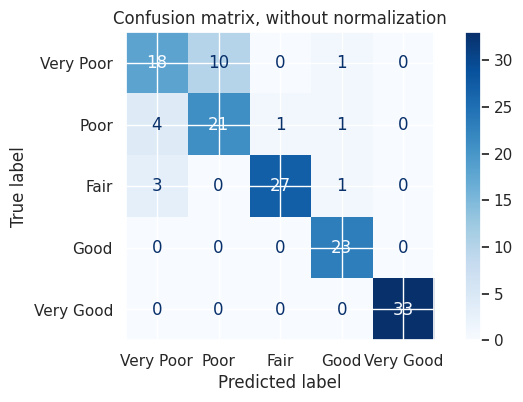

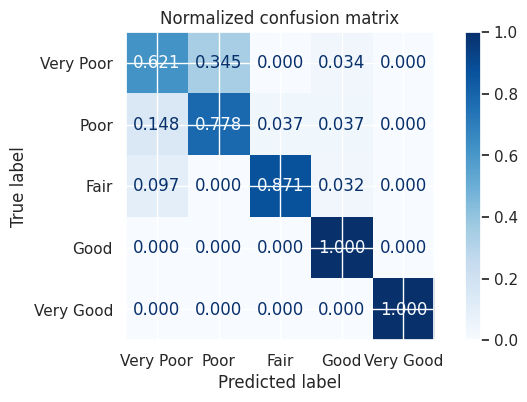

In [50]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (8,4)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(real_labels)
    disp.ax_.set_yticklabels(real_labels)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18 10  0  1  0]
 [ 4 21  1  1  0]
 [ 3  0 27  1  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 33]]


In [51]:
from sklearn.metrics import precision_score, recall_score

# Calculating precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Print the results
for i in range(len(precision)):
    print(f"Classe {i}: Precision={precision[i]}, Recall={recall[i]}")


Classe 0: Precision=0.72, Recall=0.6206896551724138
Classe 1: Precision=0.6774193548387096, Recall=0.7777777777777778
Classe 2: Precision=0.9642857142857143, Recall=0.8709677419354839
Classe 3: Precision=0.8846153846153846, Recall=1.0
Classe 4: Precision=1.0, Recall=1.0


In [53]:
print(X_train.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content'],
      dtype='object')


In [54]:
print(X_val.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content'],
      dtype='object')


In [55]:
print(X_val.isnull().sum())

Hydrogen               0
Oxigen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
dtype: int64


In [56]:
y_val_shape = y_val.shape
y_pred_shape = y_pred.shape
print(y_val_shape)
print(y_pred_shape)


(116,)
(143,)


In [57]:
X_shape = X.shape
y_shape = y.shape
print(X_shape)
print(y_shape)

(470, 14)
(470,)


In [58]:
from sklearn.metrics import accuracy_score,classification_report, precision_score, confusion_matrix, auc, f1_score, recall_score

In [61]:

pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)

# I define the function to calculate the cost

def calculate_cost(cm):

    action_unit_cost = 5

    # actions cost
    costo_normal_maintenance_very_good = 10
    costo_normal_maintenance_good = 10
    costo_increase_diagnostic_testing_fair = 20
    costo_start_planning_ror_poor = 30
    costo_immediately_ror_very_poor = 80

    #cost of prediction errors

    #unit_cost_of_class_4_but_predict_5 = 10
    #unit_cost_of_class_3_but_predict_4 = 30
    #unit_cost_of_class_2_but_predict_3 = 80

    unit_cost_of_class_1_but_predict_5 = 150
    unit_cost_of_class_1_but_predict_4 = 120
    unit_cost_of_class_1_but_predict_3 = 100
    unit_cost_of_class_1_but_predict_2 = 90

    unit_cost_of_class_2_but_predict_5 = 130
    #unit_cost_of_class_2_but_predict_4 = 120

    # number of actions
    normal_maintenance_low_actions =        cm[0,0] + cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0]
    normal_maintenance_high_actions =       cm[0,1] + cm[1,1] + cm[2,1] + cm[3,1] + cm[4,1]
    increase_diagnostic_testing_actions =   cm[0,2] + cm[1,2] + cm[2,2] + cm[3,2] + cm[4,2]
    start_planning_ror_actions =            cm[0,3] + cm[1,3] + cm[2,3] + cm[3,3] + cm[4,3]
    immediately_ror_actions =               cm[0,4] + cm[1,4] + cm[2,4] + cm[3,4] + cm[4,4]

    # cost of actions
    normal_maintenance_low_cost_of_action = normal_maintenance_low_actions * costo_normal_maintenance_very_good
    normal_maintenance_high_cost_of_action = normal_maintenance_high_actions * costo_normal_maintenance_good
    increase_diagnostic_testing_cost_of_action = increase_diagnostic_testing_actions * costo_increase_diagnostic_testing_fair
    start_planning_ror_cost_of_action = start_planning_ror_actions * costo_start_planning_ror_poor
    immediately_ror_cost_of_action = immediately_ror_actions * costo_immediately_ror_very_poor

   # calculating the cost of prediction errors:
    cost_of_class_1_but_predict_5 =        cm[0,0] + cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0] #+ cm[5,0]
    cost_of_class_1_but_predict_4 =        cm[0,1] + cm[1,1] + cm[2,1] + cm[3,1] + cm[4,1] #+ cm[5,1]
    cost_of_class_1_but_predict_3 =       cm[0,2] + cm[1,2] + cm[2,2] + cm[3,2] + cm[4,2] #+ cm[5,2]
    cost_of_class_1_but_predict_2 =        cm[0,3] + cm[1,3] + cm[2,3] + cm[3,3] + cm[4,3] #+ cm[5,3]
    cost_of_class_2_but_predict_5 =        cm[0,4] + cm[1,4] + cm[2,4] + cm[3,4] + cm[4,4] #+ cm[5,4]

    #cost_of_class_4_but_predict_5 =        cm[0,5] + cm[1,5] + cm[2,5] + cm[3,5] + cm[4,5] + cm [5,5]

    total_cost_of_class_1_but_predict_5 = cost_of_class_1_but_predict_5 * unit_cost_of_class_1_but_predict_5
    total_cost_of_class_1_but_predict_4 = cost_of_class_1_but_predict_4 * unit_cost_of_class_1_but_predict_4
    total_cost_of_class_1_but_predict_3 = cost_of_class_1_but_predict_3 * unit_cost_of_class_1_but_predict_3
    total_cost_of_class_1_but_predict_2 = cost_of_class_1_but_predict_2 * unit_cost_of_class_1_but_predict_2
    total_cost_of_class_2_but_predict_5 = cost_of_class_2_but_predict_5 * unit_cost_of_class_2_but_predict_5


    total_cost_of_prediction_errors = (total_cost_of_class_1_but_predict_5 +
                                       total_cost_of_class_1_but_predict_4 +
                                       total_cost_of_class_1_but_predict_3 +
                                       total_cost_of_class_1_but_predict_2 +
                                       total_cost_of_class_2_but_predict_5)

    total_cost_of_action = (normal_maintenance_low_cost_of_action +
                            normal_maintenance_high_cost_of_action +
                            increase_diagnostic_testing_cost_of_action +
                            start_planning_ror_cost_of_action +
                            immediately_ror_cost_of_action)

    # Calculating the total cost of the model

    cost_of_model = total_cost_of_prediction_errors + total_cost_of_action

    return cost_of_model



In [ ]:
cm

array([[24,  5,  0,  0,  0],
       [ 3, 22,  1,  1,  0],
       [ 7,  2, 21,  1,  0],
       [ 0,  0,  0, 23,  0],
       [ 0,  0,  0,  0, 33]])

In [62]:
classifier=[]
cost = []

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('BaggingClassifier')
cost.append(cost_level)

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('MLPClassifier')
cost.append(cost_level)

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('GradientBoostingClassifier')
cost.append(cost_level)

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('AdaBoostClassifier')
cost.append(cost_level)

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('RandomForestClassifier')
cost.append(cost_level)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('LogisticRegression')
cost.append(cost_level)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('KNeighborsClassifier')
cost.append(cost_level)

#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cost_level = calculate_cost(cm)
classifier.append('Support Vector Machine')
cost.append(cost_level)

In [63]:
# Final classification of models
classifiers = pd.DataFrame({'Classifier':classifier,'Cost':cost})
classifiers.sort_values(by = ["Cost"])

,Classifier,Cost
5,LogisticRegression,17410
2,GradientBoostingClassifier,17480
4,RandomForestClassifier,17490
6,KNeighborsClassifier,17510
0,BaggingClassifier,17520
1,MLPClassifier,17570
7,Support Vector Machine,17900
3,AdaBoostClassifier,20770
